# Morpion Solitaire Command-Line Interface (CLI)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

This gives an example of usage of the Morpion Solitaire command line interface:

In [22]:
!dotnet run --project MorpionSolitaireCLI


Usage example:
  MorpionSolitaireCLI.exe -n <number of games to run>
  dotnet run --project MorpionSolitaireCLI -- -n <number of games to run>

Optional flags

    --timing      : show the running time
    --progress    : display a progress bar

    --path <path>    : directory in which data is saved
    --maxHistogram   : save histogram with score occurence

    --revertMode <mode>     : 'Restart' (default), 'RandomNode', 'DiscardedBranch'
    --weightPower <int>     : use a weighted probability with satisfying
    --weightOffset <double>     [function(score) = score^power + offset]



## Basic exploration

Command to run 1,000,000 games (ca. 15 minutes run time):

```dotnet run --project MorpionSolitaireCLI -- -n 1000000 --timing --progress --path "D:\Private\MorpionSolitaire\dotnet\data\basic" --maxHistogram```

In [3]:
basic_histogram = pd.read_csv("data/basic/maxHistogram.csv", names=["Score", "Count"])
basic_histogram["Count"].sum()

1000000

In [4]:
basic_histogram["Frequency"] = basic_histogram["Count"] / basic_histogram["Count"].sum()

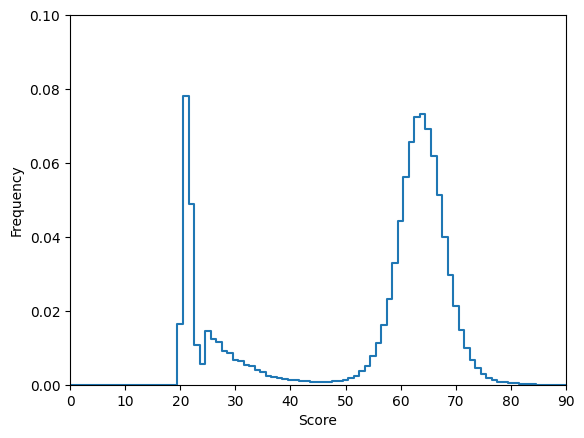

In [5]:
plt.step(basic_histogram["Score"], basic_histogram["Frequency"], where='mid')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(0, 90)
plt.ylim(0, 0.10)
plt.show()

## Revert to random node

Command to run 100,000 games (ca. 1 minute run time):

```dotnet run --project MorpionSolitaireCLI -- -n 100000 --timing --progress --path "D:\Private\MorpionSolitaire\dotnet\data\discarded" --maxHistogram --revertMode RandomNode```

In [29]:
randomNode_histogram = pd.read_csv("data/randomNode/maxHistogram.csv", names=["Score", "Count"])
randomNode_histogram["Count"].sum()

100000

In [30]:
randomNode_histogram["Frequency"] = randomNode_histogram["Count"] / randomNode_histogram["Count"].sum()

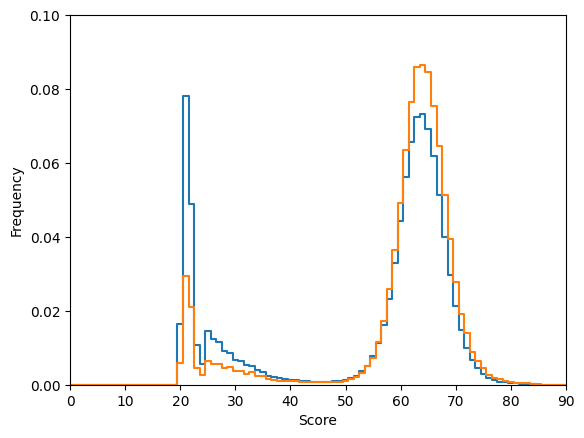

In [31]:
plt.step(basic_histogram["Score"], basic_histogram["Frequency"], where='mid')
plt.step(randomNode_histogram["Score"], randomNode_histogram["Frequency"], where='mid')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(0, 90)
plt.ylim(0, 0.10)
plt.show()

## Revert to random node with linear weight

Command to run 100,000 games (ca. 1 minute run time):

```dotnet run --project MorpionSolitaireCLI -- -n 100000 --timing --progress --path "D:\Private\MorpionSolitaire\dotnet\data\randomNodeLinearWeight" --maxHistogram --revertMode RandomNode --weightPower 1```

In [32]:
randomNodeLinearWeight_histogram = pd.read_csv("data/randomNodeLinearWeight/maxHistogram.csv", names=["Score", "Count"])
randomNodeLinearWeight_histogram["Count"].sum()

100000

In [33]:
randomNodeLinearWeight_histogram["Frequency"] = randomNodeLinearWeight_histogram["Count"] / randomNodeLinearWeight_histogram["Count"].sum()

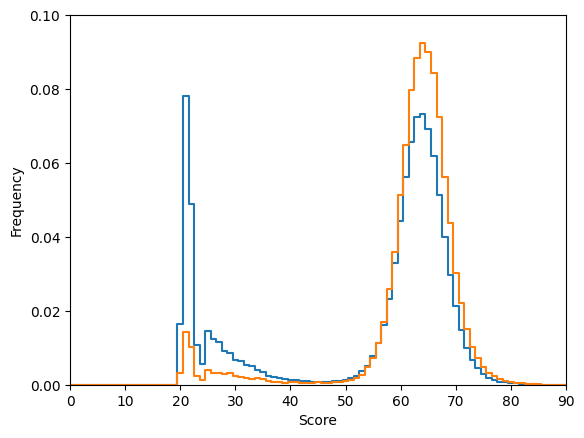

In [34]:
plt.step(basic_histogram["Score"], basic_histogram["Frequency"], where='mid')
plt.step(randomNodeLinearWeight_histogram["Score"], randomNodeLinearWeight_histogram["Frequency"], where='mid')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(0, 90)
plt.ylim(0, 0.10)
plt.show()

## Revert to random node with square weight

Command to run 100,000 games (ca. 1 minute run time):

```dotnet run --project MorpionSolitaireCLI -- -n 100000 --timing --progress --path "D:\Private\MorpionSolitaire\dotnet\data\randomNodeSquareWeight" --maxHistogram --revertMode RandomNode --weightPower 2```

In [36]:
randomNodeSquareWeight_histogram = pd.read_csv("data/randomNodeSquareWeight/maxHistogram.csv", names=["Score", "Count"])
randomNodeSquareWeight_histogram["Count"].sum()

100000

In [37]:
randomNodeSquareWeight_histogram["Frequency"] = randomNodeSquareWeight_histogram["Count"] / randomNodeSquareWeight_histogram["Count"].sum()

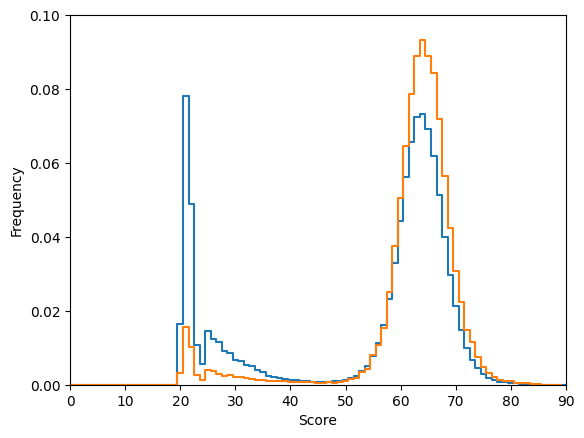

In [38]:
plt.step(basic_histogram["Score"], basic_histogram["Frequency"], where='mid')
plt.step(randomNodeSquareWeight_histogram["Score"], randomNodeSquareWeight_histogram["Frequency"], where='mid')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(0, 90)
plt.ylim(0, 0.10)
plt.show()

## Revert to discarded branches

Command to run 100,000 games (ca. 1 minute run time):

```dotnet run --project MorpionSolitaireCLI -- -n 100000 --timing --progress --path "D:\Private\MorpionSolitaire\dotnet\data\discarded" --maxHistogram --revertMode DiscardedBranch```

In [9]:
discarded_histogram = pd.read_csv("data/discarded/maxHistogram.csv", names=["Score", "Count"])
discarded_histogram["Count"].sum()

100000

In [10]:
discarded_histogram["Frequency"] = discarded_histogram["Count"] / discarded_histogram["Count"].sum()

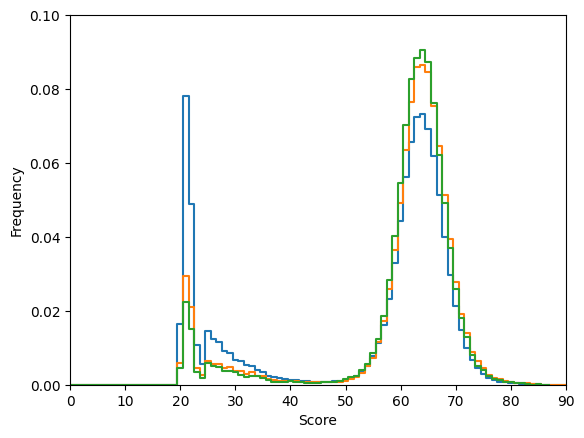

In [11]:
plt.step(basic_histogram["Score"], basic_histogram["Frequency"], where='mid')
plt.step(randomNode_histogram["Score"], randomNode_histogram["Frequency"], where='mid')
plt.step(discarded_histogram["Score"], discarded_histogram["Frequency"], where='mid')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(0, 90)
plt.ylim(0, 0.10)
plt.show()

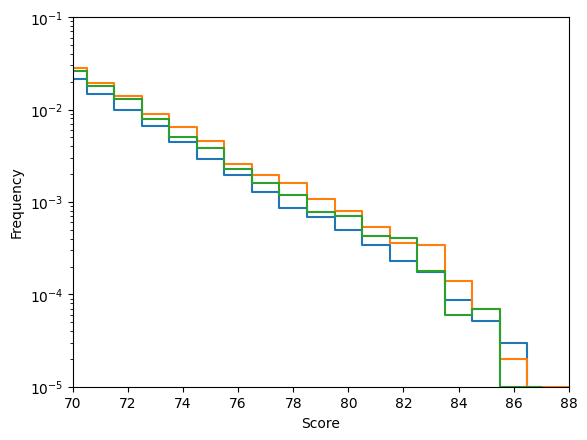

In [12]:
xmin, xmax = 70, 88
basic_histogram_tail = basic_histogram[xmin:xmax+1]
discarded_histogram_tail = discarded_histogram[xmin:xmax+1]
plt.step(basic_histogram_tail["Score"], basic_histogram_tail["Frequency"], where='mid')
plt.step(randomNode_histogram["Score"], randomNode_histogram["Frequency"], where='mid')
plt.step(discarded_histogram_tail["Score"], discarded_histogram_tail["Frequency"], where='mid')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(xmin, xmax)
plt.ylim(0.00001, 0.1)
plt.yscale('log')
plt.show()